# Assignment 2


## Instructions

**Assessed Content**:  You need to have worked through all notebooks up to (and including) notebook 9.

**Deadline**: Week 7, Friday at 5pm. Submit *this notebook with your solutions included* via e-submissions on Canvas.

**Late-penalties**: Work handed in up to 24h late will incur a 5% penalty, i.e. 85 will be capped at 80.

**Weighting**:  This is a summative assessment with a weight of 15% of the total PIP mark.

**Feedback**:  A model solution will be released on Sussex Direct after the 24hr deadline.

**Release of marks**: We aim to get marks onto Sussex Direct within (an absolute maximum) of 10 working days.

**Getting help**: Your primary source of help is during the Seminars in assessment week. Note that you can't skip the lab scripts and expect to be helped with the assessments.

**Formatting and Commenting your code**: Your code should look neat and include comments to describe what your code does. If it isn't obvious what a line or block of code does it needs a comment. *Please use the single cell provided for each question*. Some parts of your code may need higher comment density than others. Up to two marks will be deducted if your code is poorly formatted and/or poorly commented.

**Collusion and Plagiarism**: By all means work together in groups, but you are expected to write your code independently. If at any time you are using "cut and paste" from someone else's work then you are doing something wrong and you need to stop. We have dealt with a myriad of collusion and plagirism in the past, don't add to the list.

**Zombie codes**: One mark will be deducted if your code gets trapped in a loop and the grader has to crash out of it.

**Advanced solutions**: Up to two marks will be deducted if your code uses advanced methods that have not been covered in the lab sessions. They might be clever, but you aren't demonstrating understanding of the foundations (save those advanced methods for the future).

**Avoid simple errors**: Before submitting make sure to restart and run all cells. It's easy with notebooks to accidentally delete a variable somewhere and continue using it because it is still in memory. Make sure your code still works after a restart!

**Keep your files local**: This assignment requires the loading of files. You do not need to upload these files but **you do need to have them in the same directory as your notebook**. This means the file path for loading your files will always be `"myfile.csv"` or similar, i.e. no extra directories in the path. The markers will not move directories around to ensure your code works!

**Marks**: There are 10 marks available. You can find the number of marks alloted to a question in square brackets at the end of a question.

In this assignment you'll analyse real (but anonymised) attendance and attainment data from MPS. By the end of the assignment you should have a series of plots probing the relation between attendance and attainment. This is a real example of data analysis, there are purposesly rough edges to the input data you'll have to fix along the way (e.g. question 2). 

This may or may not be a (not so) subtle method to demonstrate the importance of attendance...

## 1.

Download `"attendance.csv"` from Canvas and place it in the same directory as your assignment Notebook. In the cell below load `"attendance.csv"` using `pandas` and output/print the dataframe. (Do you remember how to get the "prettiest" output?) **[1]** 

In [1]:
import pandas as pd


# Read in the csv file with pandas
df = pd.read_csv("attendance.csv")

df

,Year,Course,attendance,Mean_Mark
0,2,Physics,15.0%,71.3
1,0,Phys and Astro (FDN),3.8%,43.0
2,2,Physics,40.7%,62.0
3,1,Physics,48.5%,10.0
4,0,Phys and Astro (FDN),30.1%,36.8
...,...,...,...,...
230,1,Physics,71.0%,62.0
231,1,Theoretical Physics,78.9%,67.8
232,0,Phys and Astro (FDN),51.9%,11.8
233,1,Physics,92.7%,86.0


## 2.

You may have noticed the `"attendance"` column is a string not a number. This won't work for what comes next! Extract this column, remove the final character of the string in each entry (the `"%"`), convert them to `float`s, and reassign them to the `"attendance"` column. **[2]**

In [2]:
# Get the array values
attendance = df.attendance

# Loop over the values converting striping the % and converting to floats
new_values = []
for ind in range(len(attendance)):
    new_values.append(float(attendance[ind][:-1]))

# Assign the new values to the column
df.attendance = new_values

## 3.

Make a scatter plot of `"Mean_Mark"` vs `"attendance"` and the limits set to be `-5-105` on both the $x$ and $y$ axes. You are free to style this plot however you want but make sure you label the axes with meaningful labels with units (%)! **[1]**

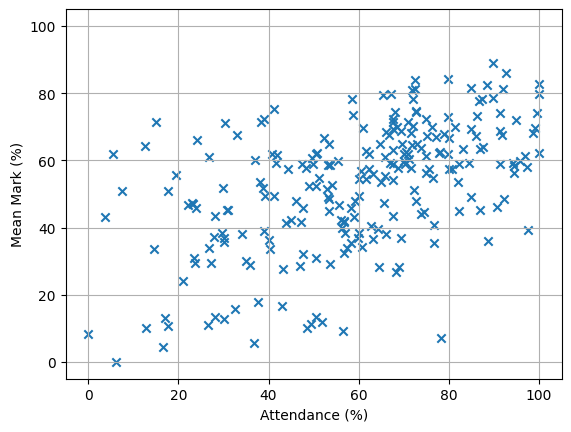

In [3]:
import matplotlib.pyplot as plt


# Set up the figure
plt.figure(1)

# Add a grid (personal preference)
plt.grid(True)

# Plot the scatter (you can also use plt.plot and turn off the linestyle)
plt.scatter(df.attendance, df.Mean_Mark, marker="x")

# Add sensible labels
plt.xlabel("Attendance (%)")
plt.ylabel("Mean Mark (%)")

# Set the limits
plt.xlim(-5, 105)
plt.ylim(-5, 105)

plt.show()

## 4.

The CSV file has some extra information we can use to make the plot more informative. Take your code from question 3 but instead of plotting every year all at once, plot each year as a different coloured marker with a label and a legend, you can do this in a loop (years run 0-4, inclusive of 4), `matplotlib` will helpfully set the color of each line to be different. [2]

To extract the data for a specific year you can use the following code as a guide:
```
mask = df.Year == year
attendance_per_year = df.attendance[mask]
```
This is an example of "boolean indexing".

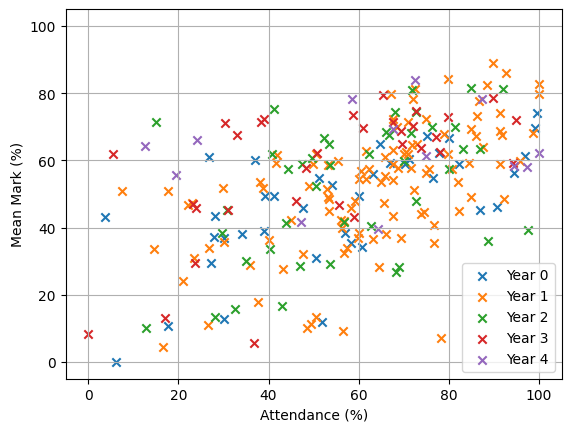

In [4]:
# Start by setting up a new plot
plt.figure(2)

# Add a grid (personal preference)
plt.grid(True)

# Loop over years
for year in range(5):
    
    # Plot the scatter for this year with a label (behind the scenes the colours are changing automatically)
    mask = df.Year == year
    plt.scatter(df.attendance[mask], df.Mean_Mark[mask], marker="x", label=f"Year {year}")

# Add sensible labels
plt.xlabel("Attendance (%)")
plt.ylabel("Mean Mark (%)")

# Set the limits
plt.xlim(-5, 105)
plt.ylim(-5, 105)

# Draw the legend
plt.legend()

plt.show()
     


## 5.

You should see that there's no obvious trend in the data based on the year of study (at least it's very hard to see if there is one in this plot). 

Now show this more explictly by fitting straight lines (first order polynomials) to the data. You can use the code from question 4, but now plot lines of best fit. To do this:

- Loop over each year and extract the x and y values using boolean indexing like question 4.
- Fit the data from each year.
- Evaluate and plot the resulting fit for each year.
- Modify your label code from question 4 to include how many students were in each year, i.e. the number of data points the fit was derived from. **[3]**



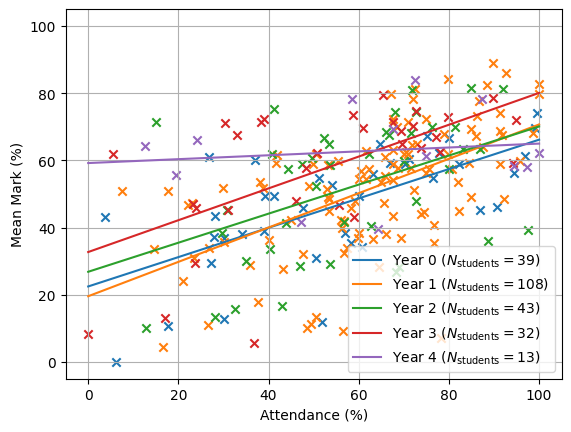

In [7]:
import numpy as np


# Start by setting up a new plot
plt.figure(3)

# Add a grid (personal preference)
plt.grid(True)

# Loop over years
for year in range(5):

    # Make the boolean indexing mask
    mask = df.Year == year

    # Using numpy, fit the line with a first order polynomial
    coeff = np.polyfit(df.attendance[mask], df.Mean_Mark[mask], 1) 
    poly_func = np.poly1d(coeff)

    # Some x values to plot the fit with
    x_fit = np.linspace(0, 100, 100)    

    # Plot the scatter for this year (not required for the marks))
    plt.scatter(df.attendance[mask], df.Mean_Mark[mask], marker="x")

    # And plot the fit with a label
    plt.plot(x_fit, poly_func(x_fit), label=f"Year {year}" + " ($N_\mathrm{students}=$" + f"{len(df.attendance[mask])})")

# Add sensible labels
plt.xlabel("Attendance (%)")
plt.ylabel("Mean Mark (%)")

# Set the limits
plt.xlim(-5, 105)
plt.ylim(-5, 105)

# Draw the legend
plt.legend()

plt.show()

## 6.

What conclusions do you draw from these observed trends? Write your answer in this cell below the question. **[1]**

- In general, attainment increases with increasing attendance.
- The slope of attainment vs attendance is reduced for masters students but the sample size is small.
- Attainment increases with year of study.